In [1]:
# MCSB Bootcamp Dry
# Leslie Heid
# Simulate a transcription factor diffusing inside the cytoplasm, searching
# for a nuclear pore complex

using PyPlot

In [2]:
# numerical parameters
dt = 0.001; # s
ntmax = 1e6;

NSample = 2000; # number of samples

# model parameters
D = 10; # microns^2/second
L = 10; # microns
NPCSize = 0.1; # microns
NPCLocation = [-L/2,0];

alpha = sqrt(2*D*dt);

# data collection
tCapture = zeros(NSample,1);

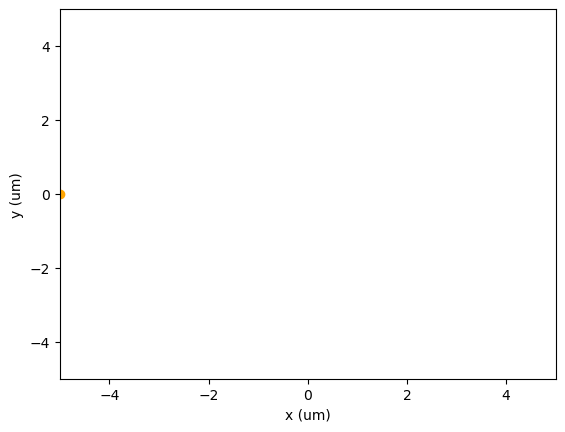

In [3]:
# numerical parameters
dt = 0.001; # s
ntmax = 1e6;

NSample = 2000; # number of samples

# model parameters
D = 10; # microns^2/second
L = 10; # microns
NPCSize = 0.1; # microns
NPCLocation = [-L/2,0];

alpha = sqrt(2*D*dt);

# data collection
tCapture = zeros(NSample,1);

# set up figure
figure(1);
plot(NPCLocation[1], NPCLocation[2], marker="o", color="orange")
ylim([-L/2,L/2])
xlim([-L/2,L/2])
xlabel("x (um)"); 
ylabel("y (um)");

In [8]:
## Simulate!

@time begin

for iSample in 1:NSample
    
    # intial condition
    x = [L/2,0];
    
    t = 0;
    for nt in 1:ntmax
        
        # dynamics
        x = x + alpha*randn(2,1);
        
        # boundaries
        if x[1]>L/2
            x[1]=L/2
        elseif x[1]<-L/2
            x[1]=-L/2
        end
        
        if x[2]>L/2
            x[2]=L/2
        elseif x[2]<-L/2
            x[2]=-L/2
        end
        
        # test for NPC capture
        if ( (x[1]-NPCLocation[1])^2 + (x[2]-NPCLocation[2])^2 < NPCSize^2 )
            tCapture[iSample] = t
            break;
        end

        t = t+dt;
        
    end # finished loop through time
        
end # finished loop through samples
end

 37.655010 seconds (787.39 M allocations: 19.254 GiB, 5.96% gc time)


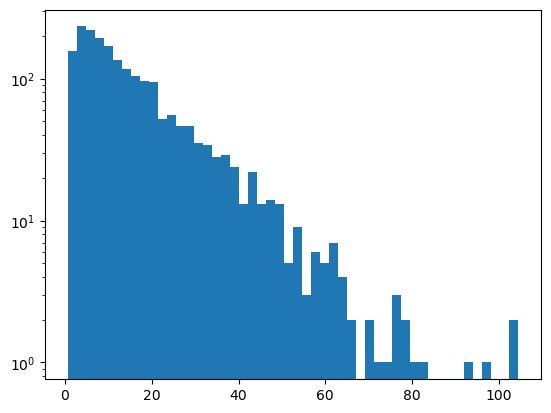

In [7]:
# analyze results
hist(tCapture, 50)
yscale("log")
# set(gca,'yscale','log')